In [3]:
## personal imports
from processor.processor import Processor as p
from database.market import Market
from database.adatabase import ADatabase

from analysis.weekly_analysis import WeeklyAnalysis as anas

## risk and return class imports
from returns.products import Products as returns_products_class
from strategy.strategy import Strategy as strategy_list
from fund.fund import Fund
## standard imports
from statistics import variance
import math
from datetime import datetime, timedelta
import pytz
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
strats = [
              strategy_list.CRYPTO_WEEKLY_SPECULATION_CLASSIFICATION,
#             strategy_list.STOCK_WEEKLY_SPECULATION,
          strategy_list.CRYPTO_WEEKLY_ROLLING,
#           strategy_list.STOCK_WEEKLY_ROLLING,
#           strategy_list.CRYPTO_WEEKLY_WINDOW,
#           strategy_list.STOCK_WEEKLY_WINDOW,
#           strategy_list.STOCK_QUARTERLY_FINANCIAL
         ]
model_start_date  = datetime(2020,1,1)
model_end_date  = datetime(2021,1,1)
current_start_date  = datetime(2021,1,1)
fund = Fund(strats,model_start_date,model_end_date,current_start_date)
fund.initialize_strats()

In [5]:
market = Market()

In [6]:
market.connect()
sp500 = market.retrieve("sp500")
market.disconnect()
sp500 = sp500.rename(columns={"Symbol":"ticker"})

In [7]:
tyields = returns_products_class.tyields()
bench_returns = returns_products_class.spy_bench()

In [8]:
t = fund.pull_trades()

In [9]:
t = pd.concat(t)

In [10]:
nonindex_columns = [
"year"
,"week"
,"ticker"
,"delta_sign"
,"delta"
,"returns"
,"floored_returns"
,"position"
,"actual_returns"
,"positions"] 

In [11]:
indexers = []
indexer = []
for col in t.columns:
    if col not in nonindex_columns:
        indexers.append(list(t[col].unique()))
        indexer.append(col)

In [12]:
stuff = t[indexer].to_dict("records")
parameters = [dict(t) for t in {tuple(d.items()) for d in stuff}]

In [13]:
analysis = []
for parameter in parameters:
    try:
        ledger = t.sort_values(["year","week"]).copy()
        for key in parameter.keys():
            ledger = ledger[ledger[key]==parameter[key]]
        positions = int(ledger["positions"].mean())
        if ledger.index.size > 0:
            cumulative = anas.trade_analysis(indexer,ledger,positions,parameter,tyields,bench_returns)
            analysis.append(cumulative[indexer + ["pv","beta","rrr","sharpe"]].iloc[-1])
    except Exception as e:
        print(str(e))
        continue
a = pd.DataFrame(analysis)

In [14]:
a

,value,classification,ceiling,floor,strat,pv,beta,rrr,sharpe
25,True,True,True,True,weekly_crypto_speculation,0.430100,21.226133,NaN,-0.029318
25,True,False,False,True,weekly_crypto_rolling,0.634639,15.060513,NaN,-0.027739
25,True,False,True,True,weekly_crypto_speculation,0.430100,21.226133,NaN,-0.029318
25,False,True,True,False,weekly_crypto_speculation,0.220748,7.809019,NaN,-0.106499
25,True,True,False,False,weekly_crypto_rolling,0.350915,0.579936,NaN,-1.209590
25,False,False,False,False,weekly_crypto_rolling,0.350915,0.579936,NaN,-1.209590
25,True,False,False,True,weekly_crypto_speculation,0.430100,21.226133,NaN,-0.029318
25,False,False,False,False,weekly_crypto_speculation,0.220748,7.809019,NaN,-0.106499
25,False,True,False,True,weekly_crypto_rolling,0.634639,15.060513,NaN,-0.027739
25,True,True,False,False,weekly_crypto_speculation,0.220748,7.809019,NaN,-0.106499


In [15]:
a.sort_values("pv",ascending=False).groupby("strat").first().reset_index().sort_values("pv")

,strat,value,classification,ceiling,floor,pv,beta,rrr,sharpe
1,weekly_crypto_speculation,True,False,False,True,0.430100,21.226133,NaN,-0.029318
0,weekly_crypto_rolling,False,True,False,True,0.634639,15.060513,NaN,-0.027739


In [16]:
top = a.sort_values("pv",ascending=False).iloc[0]
analysis = t
for key in parameter.keys():
    analysis = analysis[(analysis[key]==top[key])]
ledger = analysis[["year","week","ticker","delta","delta_sign","actual_returns","position"]]
ledger = ledger.merge(sp500[["ticker","GICS Sector","Security"]],on="ticker",how="left")

In [17]:
ledger.sort_values("actual_returns",ascending=False).head(30)

,year,week,ticker,delta,delta_sign,actual_returns,position,GICS Sector,Security
5,2020.0,12.0,BTC,-0.677346,1.0,1.186226,0,NaN,NaN
8,2020.0,18.0,BTC,-0.030904,1.0,1.135481,0,NaN,NaN
17,2020.0,36.0,BTC,-0.136984,-1.0,1.121855,0,NaN,NaN
7,2020.0,17.0,BTC,-0.178744,1.0,1.097463,0,NaN,NaN
12,2020.0,26.0,BTC,-0.165528,-1.0,1.048469,0,NaN,NaN
6,2020.0,14.0,BTC,-0.278821,1.0,1.045777,0,NaN,NaN
3,2020.0,8.0,BTC,-0.156448,-1.0,1.044918,0,NaN,NaN
0,2020.0,4.0,BTC,-0.077213,-1.0,1.034354,0,NaN,NaN
11,2020.0,24.0,BTC,-0.189941,-1.0,1.032142,0,NaN,NaN
19,2020.0,42.0,BTC,-0.079164,-1.0,1.009083,0,NaN,NaN


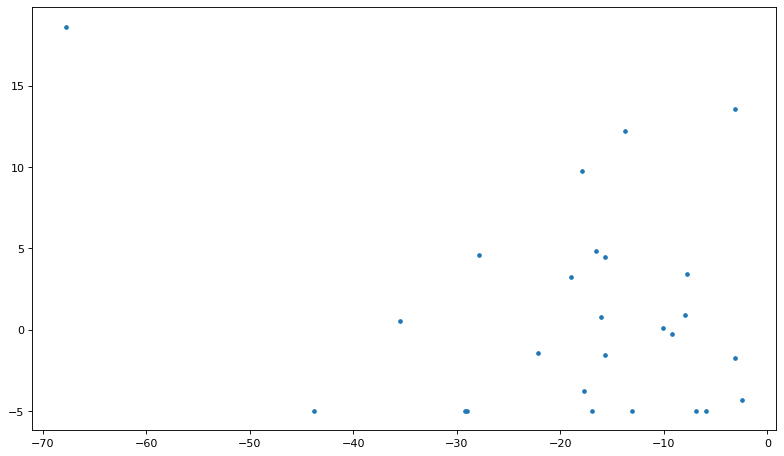

In [18]:
plt.figure(figsize=(12, 7), dpi=80)
plt.scatter(ledger["delta"] * 100, (ledger["actual_returns"]-1)*100,s=10)

In [19]:
portfolio = ledger.pivot_table(index=["year","week"],columns="position",values="actual_returns").fillna(1).reset_index()

In [20]:
cumulative = anas.iteration_analysis(portfolio,positions,bench_returns)

In [21]:
cumulative

,0,date_string,date,pv,adjclose,bench
0,1.034354,2020-W4,2020-01-24,0.517177,328.77,1.000000
1,1.035245,2020-W5,2020-01-31,0.517623,321.73,0.978587
2,0.983483,2020-W6,2020-02-07,0.491742,332.20,1.010433
3,1.027659,2020-W8,2020-02-21,0.513829,333.48,1.014326
4,0.976276,2020-W11,2020-03-13,0.488138,269.32,0.819174
5,1.158084,2020-W12,2020-03-20,0.579042,228.80,0.695927
6,1.211098,2020-W14,2020-04-03,0.605549,248.19,0.754905
7,1.329135,2020-W17,2020-04-24,0.664568,282.97,0.860693
8,1.509208,2020-W18,2020-05-01,0.754604,282.79,0.860145
9,1.433747,2020-W20,2020-05-15,0.716874,286.28,0.870761


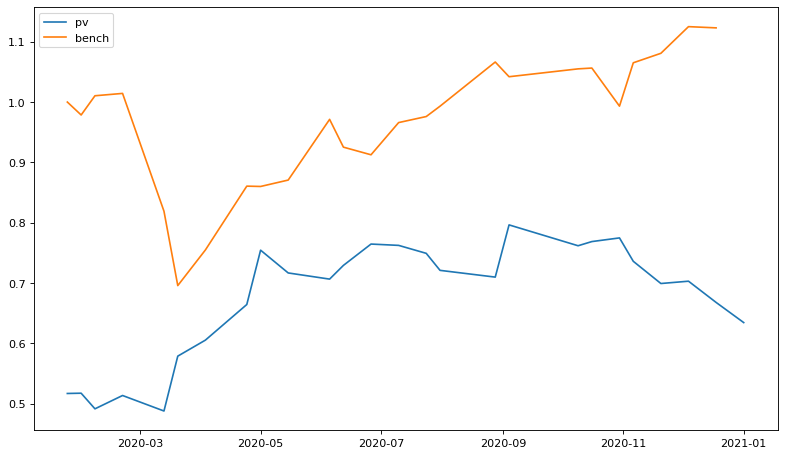

In [22]:
plt.figure(figsize=(12, 7), dpi=80)
plt.plot(cumulative["date"],cumulative["pv"])
plt.plot(cumulative["date"],cumulative["bench"])
plt.legend(["pv","bench"])

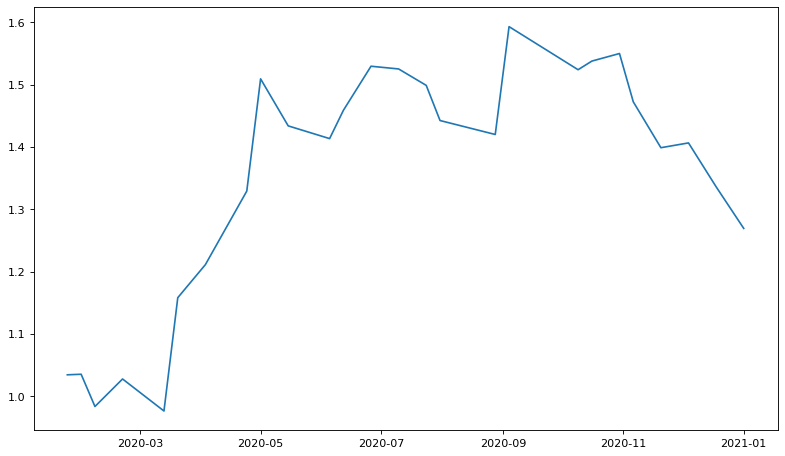

In [23]:
plt.figure(figsize=(12, 7), dpi=80)
position_columns = [x for x in cumulative.columns if x not in ["date_string","date","pv","adjclose","bench"]]
for i in position_columns:
    position = cumulative[i]
    plt.plot(cumulative["date"],position)
plt.show()


In [24]:
ledger.groupby(["GICS Sector"]).mean().sort_values("delta",ascending=False)

,year,week,delta,delta_sign,actual_returns,position
GICS Sector,,,,,,


In [25]:
ledger.groupby(["ticker","Security"]).prod().sort_values("actual_returns",ascending=False).head(20)

,,year,week,delta,delta_sign,actual_returns,position
ticker,Security,,,,,,


In [26]:
industry_analysis = ledger.pivot_table(index=["year","week"],columns="GICS Sector",values="actual_returns").fillna(1).reset_index()
industry_analysis[[x for x in industry_analysis.columns if x != "sell_date"]].cumprod()

GICS Sector,year,week
